In [51]:
import pickle
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [75]:
num_components = 50
normalize = True

In [76]:
with open('/home/aleks/hackatum/flavorscape/data/recipes_10k.pkl', 'rb') as file:
    data_pd = pickle.load(file)

data_pd = (data_pd.reset_index()
                  .drop_duplicates(subset='index', keep='last')
                  .set_index('index').sort_index())
data_pd = data_pd.drop(data_pd.std()[data_pd.std() < 0.01].index.values, axis=1)

data_np = data_pd.to_numpy()
data_mean = data_np.mean(axis=0)
data_std = data_np.std(axis=0)

data_np.shape

(3570, 1089)

In [77]:
occurence = data_pd.sum(axis=0).sort_values(ascending=False)
[i for i in list(occurence.index) if 't-' in i]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(occurence)

salt                                                                                       2889
pepper                                                                                     2831
c-american                                                                                 1763
butter-milk                                                                                1629
olive-oil                                                                                  1451
cooking-oil                                                                                1380
sour-cream                                                                                  993
garlic                                                                                      913
scallions                                                                                   823
sugar                                                                                       752
lemon                                   

In [78]:
if normalize:
    data_np_norm = (data_np - data_mean) / data_std
else:
    data_np_norm = data_np

pca = PCA(n_components=num_components)
dim_reduced_data = pca.fit_transform(data_np_norm)

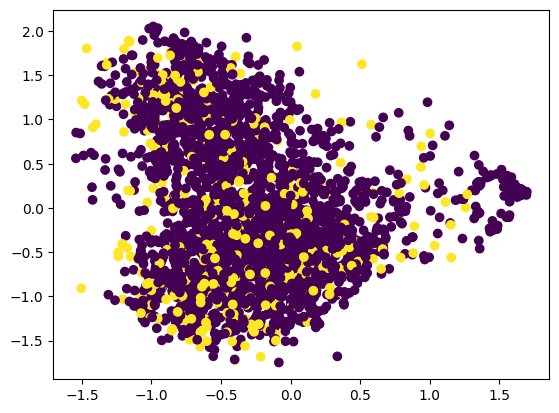

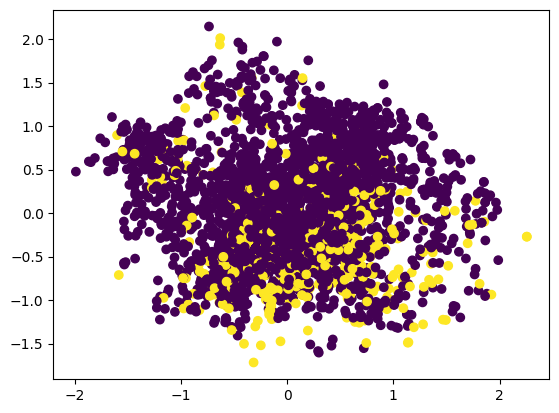

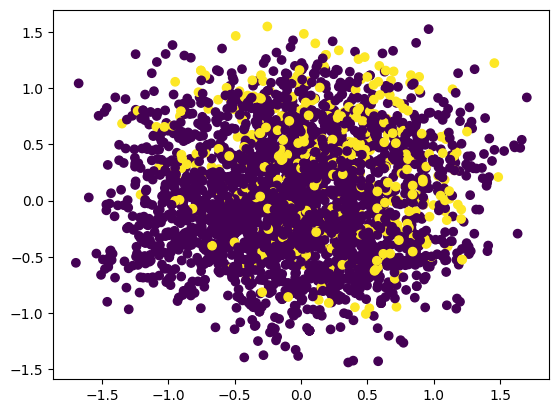

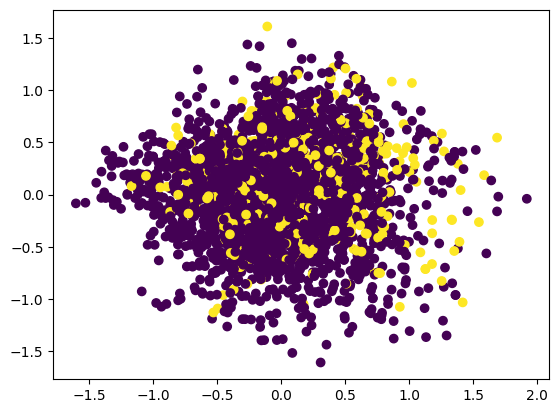

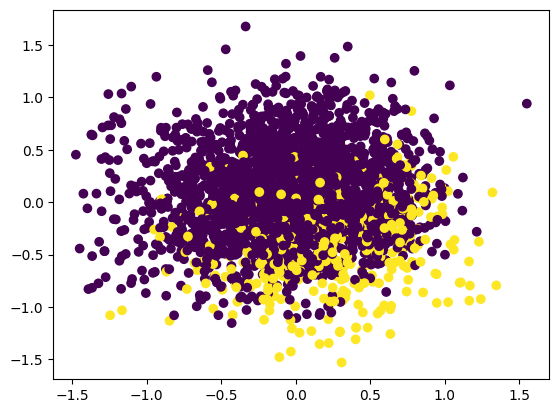

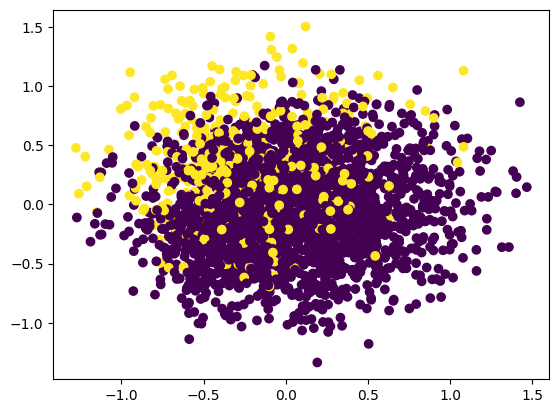

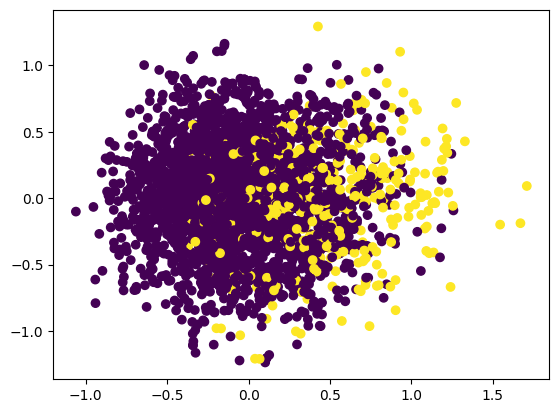

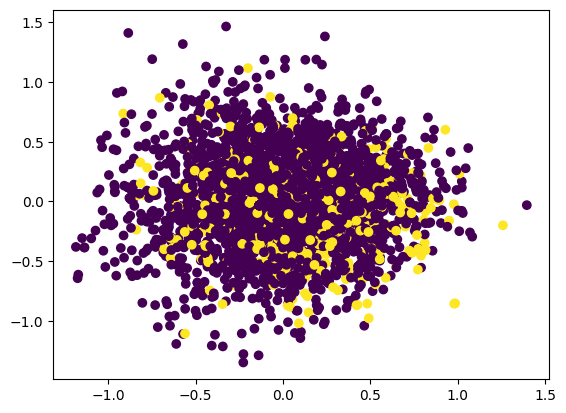

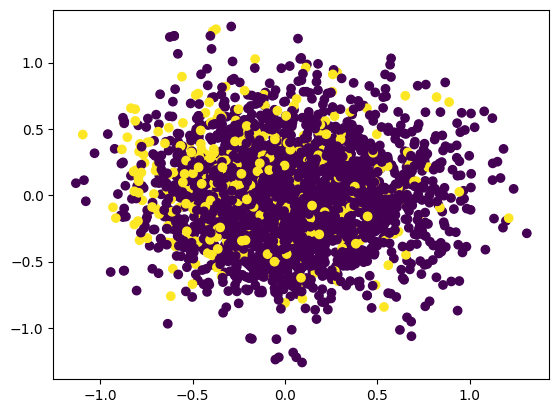

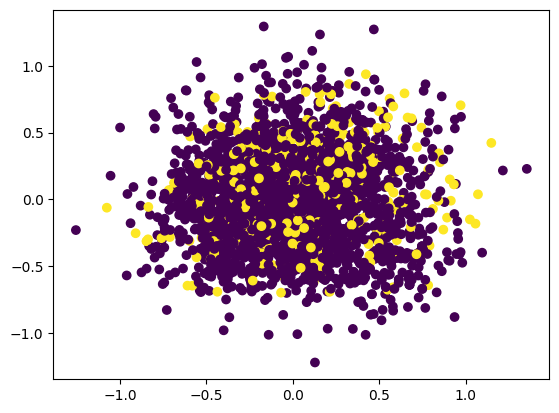

In [81]:
highlight = 't-veggie'

highlight_idx = data_pd.columns.get_loc(highlight)

for i in range(0, min(num_components, 20), 2):
    plt.figure()
    plt.scatter(dim_reduced_data[:,i], dim_reduced_data[:,i+1], c=data_np[:,highlight_idx])

In [80]:
num_recipes = 20
idx = 30



print(f'{data_pd.index[idx]}')

diff = (dim_reduced_data - dim_reduced_data[idx])
dist = np.sqrt(np.sum(diff*diff, axis=1))
sorted_idx = dist.argsort()

print(f'\nTop {num_recipes} similar:')
for i in sorted_idx[:num_recipes]:
    print(f'{round(dist[i],2)}: {data_pd.index[i]}')
    
print(f'\nTop {num_recipes} dissimilar:')
for i in sorted_idx[-num_recipes:]:
    print(f'{round(dist[i],2)}: {data_pd.index[i]}')

Annie's Chocolate Chip Cookie Dough

Top 20 similar:
0.0: Annie's Chocolate Chip Cookie Dough
0.0: Tuna & Chickpea Quinoa with Curry Cauliflower
0.0: Annie's Chocolate Chip Cookies
0.0: Pillsbury Mini REESE’S PIECES Cookie Dough
0.0: Pillsbury™ Mini REESE’S PIECES Cookie Dough
0.0: Pepperoni Focaccia Flatbread
0.0: Pepperoni Focaccia Pizza
0.0: Basil Pesto & Mozzarella Focaccia Flatbread
0.0: Basil Pesto & Mozzarella Focaccia Pizza
0.0: Annie's Organic Crispy Birthday Cake Snack Bars
0.0: Mylk Labs Almond Oatmeal
0.0: Mylk Labs Blueberry Oatmeal
0.0: Sargento Balanced Breaks with White Cheddar, Almonds & Cranberries
0.0: Sargento Balanced Breaks with Sharp Cheddar, Cashews & Cranberries
0.0: SkinnyDipped Dark Chocolate Salted Caramel Bar
0.0: Salted Caramel Apple Cookie Dough
0.0: Annie’s Organic Cinnamon Rolls
0.0: KIND Clusters Dipped Dark Chocolate Vanilla Cashew
0.0: Chocolate Chip Brownies
0.0: SkinnyDipped Strawberry Lemonade Almonds

Top 20 dissimilar:
4.3: Street Cart-Style Chi